In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class f_y(object):
  def __init__(self):
    pass
  
  def evaluate_function(self, x1, x2):
    y = 100 * np.sqrt(np.abs(x2 - 0.01 * x1**2)) + 0.01 * np.abs(x1 + 10)
    return y
  
  def evaluate_derivative(self, x1, x2):
    
    if ((x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * (x2 - 0.01 * x1 **2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif ((x1 >= -10) and not(x2 >= 0.01 * x1 **2 )):
      dx2 = - 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif (not(x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01
      
    else:
      dx2 = -50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01     
    
    return dx1, dx2
  
  
  

class grad_desc_alg(object):
  def __init__(self, function, learn_rate = 0.0001, max_epoch = 1000, thres = 1e-5):
    self.learn_rate = learn_rate
    self.max_epoch = max_epoch
    self.thres = thres
    self.function = function
#step size is 0.0001 

  def grad_desc(self, x1, x2):
    
    dx1, dx2 = self.function.evaluate_derivative(x1, x2)
    
    new_x1 = x1 - self.learn_rate * dx1
    new_x2 = x2 - self.learn_rate * dx2
    
    return new_x1, new_x2, dx1, dx2
  
  def optimise(self, start_x1 = -9, start_x2 = 1):
    all_x1 = [start_x1]
    all_x2 = [start_x2]
    all_y = [self.function.evaluate_function(start_x1, start_x2)]
    
    
    for epoch in range(self.max_epoch):
      x1,x2,dx1,dx2 = self.grad_desc(all_x1[epoch], all_x2[epoch])
      
      all_x1.append(x1)
      all_x2.append(x2)
      y = self.function.evaluate_function(x1, x2)
      all_y.append(y)
      
      print("epoch", epoch, "x1", x1,"x2", x2,"y", y)
      
      if (np.abs(dx1) + np.abs(dx2)  < 2*self.thres):
        break
    
    return all_x1, all_x2, all_y

function1 = f_y()
gd = grad_desc_alg(function = function1)

all_x1, all_x2, all_y = gd.optimise()


In [2]:
min_y = min(all_y)
print("min_y:", min(all_y))

index_min_y = all_y.index(min_y)

print("min(x1, x2) is",(all_x1[index_min_y], all_x2[index_min_y]))

min_y: 0.9198828100237131
min(x1, x2) is (-9.031205711743926, 0.8155439206087441)


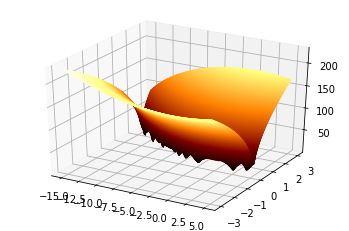

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
Axes3D = Axes3D  # pycharm auto import

all_x1 = np.linspace(-15,5,50)
all_x2 = np.linspace(-3,3,50)

X1, X2= np.meshgrid(all_x1, all_x2)
Z = function1.evaluate_function(X1,X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1,X2,Z,500,cmap='afmhot')
plt.show()

In [4]:
import numpy as np

class f_y(object):
  def __init__(self):
    pass
  
  def evaluate_function(self, x1, x2):
    y = 100 * np.sqrt(np.abs(x2 - 0.01 * x1**2)) + 0.01 * np.abs(x1 + 10)
    return y
  
  def evaluate_derivative(self, x1, x2):
    
    if ((x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * (x2 - 0.01 * x1 **2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif ((x1 >= -10) and not(x2 >= 0.01 * x1 **2 )):
      dx2 = - 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif (not(x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01
      
    else:
      dx2 = -50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01     
    
    return dx1, dx2
  
  
  

class grad_desc_alg(object):
  def __init__(self, function, learn_rate = 0.0005, max_epoch = 1000, thres = 1e-5):
    self.learn_rate = learn_rate
    self.max_epoch = max_epoch
    self.thres = thres
    self.function = function
 #change learning rate to 0.0005 
  def grad_desc(self, x1, x2):
    
    dx1, dx2 = self.function.evaluate_derivative(x1, x2)
    
    new_x1 = x1 - self.learn_rate * dx1
    new_x2 = x2 - self.learn_rate * dx2
    
    return new_x1, new_x2, dx1, dx2
  
  def optimise(self, start_x1 = -9, start_x2 = 1):
    all_x1 = [start_x1]
    all_x2 = [start_x2]
    all_y = [self.function.evaluate_function(start_x1, start_x2)]
    
    
    for epoch in range(self.max_epoch):
      x1,x2,dx1,dx2 = self.grad_desc(all_x1[epoch], all_x2[epoch])
      
      all_x1.append(x1)
      all_x2.append(x2)
      y = self.function.evaluate_function(x1, x2)
      all_y.append(y)
      
      print("epoch", epoch, "x1", x1,"x2", x2,"y", y)
      
      if (np.abs(dx1) + np.abs(dx2)  < 2*self.thres):
        break
    
    return all_x1, all_x2, all_y

function1 = f_y()
gd = grad_desc_alg(function = function1)

all_x1, all_x2, all_y = gd.optimise()
min( all_y)
min(all_y)


epoch 0 x1 -9.010328708024176 x2 0.9426460665323595 y 36.17422060621456
epoch 1 x1 -9.022791190617532 x2 0.873517164596396 y 24.383847640110666
epoch 2 x1 -9.041305182212643 x2 0.7709491720313144 y 21.57409991456259
epoch 3 x1 -9.02034679389892 x2 0.8868803782633801 y 27.06784809557067
epoch 4 x1 -9.037020301556847 x2 0.794486437992696 y 14.906247303925406
epoch 5 x1 -9.006692844214278 x2 0.962309770963093 y 38.882109633063415
epoch 6 x1 -9.018282856478724 x2 0.8979964182995401 y 29.11345294172338
epoch 7 x1 -9.033781252093723 x2 0.8120964977627306 y 6.330690065972963
epoch 8 x1 -8.962328085591805 x2 1.2076017934292433 y 63.60035598406967
epoch 9 x1 -8.969380051315959 x2 1.1682874230064348 y 60.32528261140199
epoch 10 x1 -8.976820501501715 x2 1.1268383476901072 y 56.667560052527456
epoch 11 x1 -8.984747530988082 x2 1.082713429045233 y 52.49410693832672
epoch 12 x1 -8.993312049446025 x2 1.0350798231569076 y 47.57930136670292
epoch 13 x1 -9.002769915512081 x2 0.9825248466694714 y 41.4860

1.1048381618851015

In [5]:
min_y = min(all_y)
print("min_y:", min(all_y))

index_min_y = all_y.index(min_y)

print("min(x1, x2) is",(all_x1[index_min_y], all_x2[index_min_y]))

min_y: 1.1048381618851015
min(x1, x2) is (-9.01100559306922, 0.8121021091432173)


In [6]:
import numpy as np

class f_y(object):
  def __init__(self):
    pass
  
  def evaluate_function(self, x1, x2):
    y = 100 * np.sqrt(np.abs(x2 - 0.01 * x1**2)) + 0.01 * np.abs(x1 + 10)
    return y
  
  def evaluate_derivative(self, x1, x2):
    
    if ((x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * (x2 - 0.01 * x1 **2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif ((x1 >= -10) and not(x2 >= 0.01 * x1 **2 )):
      dx2 = - 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) + 0.01
      
    elif (not(x1 >= -10) and (x2 >= 0.01 * x1 **2 )):
      dx2 = 50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01
      
    else:
      dx2 = -50 * ( 0.01 * x1 **2 - x2) ** (-0.5)
      dx1 = dx2 * (-0.02 * x1) - 0.01     
    
    return dx1, dx2
  
  
  

class grad_desc_alg(object):
  def __init__(self, function, learn_rate = 0.00005, max_epoch = 1000, thres = 1e-5):
    self.learn_rate = learn_rate
    self.max_epoch = max_epoch
    self.thres = thres
    self.function = function
 #learning rate is 0.00005 
  def grad_desc(self, x1, x2):
    
    dx1, dx2 = self.function.evaluate_derivative(x1, x2)
    
    new_x1 = x1 - self.learn_rate * dx1
    new_x2 = x2 - self.learn_rate * dx2
    
    return new_x1, new_x2, dx1, dx2
  
  def optimise(self, start_x1 = -9, start_x2 = 1):
    all_x1 = [start_x1]
    all_x2 = [start_x2]
    all_y = [self.function.evaluate_function(start_x1, start_x2)]
    
    
    for epoch in range(self.max_epoch):
      x1,x2,dx1,dx2 = self.grad_desc(all_x1[epoch], all_x2[epoch])
      
      all_x1.append(x1)
      all_x2.append(x2)
      y = self.function.evaluate_function(x1, x2)
      all_y.append(y)
      
      print("epoch", epoch, "x1", x1,"x2", x2,"y", y)
      
      if (np.abs(dx1) + np.abs(dx2)  < 2*self.thres):
        break
    
    return all_x1, all_x2, all_y

function1 = f_y()
gd = grad_desc_alg(function = function1)

all_x1, all_x2, all_y = gd.optimise()


epoch 0 x1 -9.001032870802417 x2 0.9942646066532359 y 42.91438096642398
epoch 1 x1 -9.00208233485937 x2 0.9884376972751191 y 42.207471239479936
epoch 2 x1 -9.00314949568384 x2 0.9825131745658602 y 41.47636045678384
epoch 3 x1 -9.004235591641423 x2 0.976484195717376 y 40.718876792048476
epoch 4 x1 -9.005342020732652 x2 0.970343035371376 y 39.93251992716642
epoch 5 x1 -9.00647037162823 x2 0.9640809139939612 y 39.114388807845486
epoch 6 x1 -9.007622463015252 x2 0.9576877802828333 y 38.261087930289854
epoch 7 x1 -9.008800394168267 x2 0.9511520314886925 y 37.368603898884544
epoch 8 x1 -9.010006610955354 x2 0.9444601483614601 y 36.4321399895032
epoch 9 x1 -9.011243993502557 x2 0.9375962102945461 y 35.44589004203054
epoch 10 x1 -9.012515974956777 x2 0.9305412384441735 y 34.4027224187314
epoch 11 x1 -9.013826706096317 x2 0.9232722852285513 y 33.293726645716134
epoch 12 x1 -9.015181289633448 x2 0.9157611382912847 y 32.10754303295118
epoch 13 x1 -9.016586124326786 x2 0.9079724169765407 y 30.8293

In [7]:
min_y = min(all_y)
print("min_y:", min(all_y))

index_min_y = all_y.index(min_y)

print("min(x1, x2) is",(all_x1[index_min_y], all_x2[index_min_y]))

min_y: 0.9333975679864541
min(x1, x2) is (-9.032531399897433, 0.8157809085050605)
